# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join("..", "resources", "city_data.csv")
ride_data_to_load = os.path.join("..", "resources", "ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# 1. Get the total rides for each city type
urban_ride_count = pyber_data_df.loc[pyber_data_df["type"]=="Urban"].count()["ride_id"]
suburban_ride_count = pyber_data_df.loc[pyber_data_df["type"]=="Suburban"].count()["ride_id"]
rural_ride_count = pyber_data_df.loc[pyber_data_df["type"]=="Rural"].count()["ride_id"]

In [4]:
# 2. Get the total drivers for each city type
urban_drivers = city_data_df.loc[city_data_df["type"]=="Urban"].sum()["driver_count"]
suburban_drivers = city_data_df.loc[city_data_df["type"]=="Suburban"].sum()["driver_count"]
rural_drivers = city_data_df.loc[city_data_df["type"]=="Rural"].sum()["driver_count"]

In [5]:
# 3. Get the total amount of fares for each city type
urban_fares = pyber_data_df.loc[pyber_data_df["type"]=="Urban"].sum()["fare"]
suburban_fares = pyber_data_df.loc[pyber_data_df["type"]=="Suburban"].sum()["fare"]
rural_fares = pyber_data_df.loc[pyber_data_df["type"]=="Rural"].sum()["fare"]

In [6]:
# 4. Get the average fare per ride for each city type
urban_avg_fare = urban_fares/urban_ride_count
suburban_avg_fare = suburban_fares/suburban_ride_count
rural_avg_fare = rural_fares/rural_ride_count

In [7]:
# 5. Get the average fare per driver for each city type
urban_avg_fare_driver = urban_fares/urban_drivers
suburban_avg_fare_driver = suburban_fares/suburban_drivers
rural_avg_fare_driver = rural_fares/rural_drivers

In [8]:
# 6. Create a PyBer summary DataFrame
pyber_summary = {"type": pyber_data_df["type"].unique(),
                 "Total Rides": [urban_ride_count, suburban_ride_count, rural_ride_count],
                 "Total Drivers": [urban_drivers, suburban_drivers, rural_drivers],
                 "Total Fares": [urban_fares, suburban_fares, rural_fares],
                 "Average Fare per Ride": [urban_avg_fare, suburban_avg_fare, rural_avg_fare],
                 "Average Fare per Driver": [urban_avg_fare_driver, suburban_avg_fare_driver, rural_avg_fare_driver]
                 }

pyber_summary_df = pd.DataFrame(pyber_summary)
pyber_summary_df = pyber_summary_df.iloc[::-1]
pyber_summary_df = pyber_summary_df.set_index("type")
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
# 7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
# 8. Format the columns
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_by_date_df = pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]
pyber_by_date_df.head()

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75


In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_by_date_df = pyber_by_date_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot = pyber_by_date_df.pivot(index="date", columns="type", values="fare")
pyber_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_date_range = pyber_pivot.loc[(pyber_pivot.index >= '2019-01-01') & (pyber_pivot.index <= '2019-04-29')]

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_date_range.index = pd.to_datetime(pyber_date_range.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_date_range.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_resample = pyber_date_range.resample('W').sum()
pyber_resample.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [19]:
import numpy as np
import datetime as dt
import calendar

len(pyber_resample.index)
pyber_resample.index

pyber_resample_month = pyber_date_range.resample('BMS').sum()
pyber_resample_months = pyber_date_range.resample('BMS').sum()
pyber_resample_months.index = pd.DatetimeIndex(pyber_resample_month.index).month

xticks = [calendar.month_abbr[x] for x in pyber_resample_months.index]

print(pyber_resample_month.index)
print(pyber_resample.index)
print(xticks)




DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01'], dtype='datetime64[ns]', name='date', freq='BMS')
DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28'],
              dtype='datetime64[ns]', name='date', freq='W-SUN')
['Jan', 'Feb', 'Mar', 'Apr']


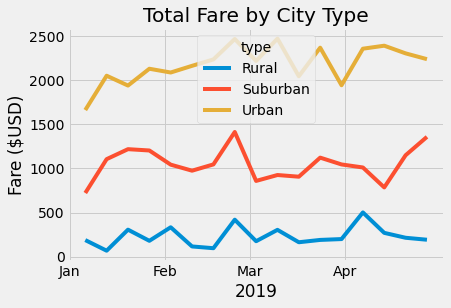

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
lineObjects = plt.plot(pyber_resample.index, pyber_resample)

# Formatting chart
plt.legend(iter(lineObjects), pyber_resample.columns.to_list(), title="type")
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("2019")
plt.xticks(pyber_resample_month.index, xticks)

lineObjects

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

